# NetworkN Layout Tutorial

In this tutorial, we will show you to use the NetworkN toolbox. The toolbox allows you to load information from a text file and convert it to a network, add information to a network, and change its layout based off of a Cytoscape Styling. NetworkN's toolbox requires Python 2.7.9 and the latest version of the PIP Python package manager for installation. For further details on installing and using the NDEx module, see the NDEx Client Tutorial.

## Importing Packages

With the NDex module installed, start Python and import NdexGraph.

In [1]:
%matplotlib inline
import ndex.beta.toolbox as toolbox
from ndex.networkn import NdexGraph
#Anything below is not needed
import networkx as nx
import matplotlib.pyplot as plt

## Loading Networks

In order to load a network using a textfile, you must first create an empty graph. For further information about creating graphs, please view the NetworkN Tutorial.

In [2]:
G = NdexGraph()

Using the method load(graph, filename,edge_attributes,header), you can input information into the graph. "graph" should contain the empty graph, filename should be the text file, edge_attributes (optional) contains a list of all the attribute keys for the edges, and header is a true/false value depending on if there is a header in the text. The text file should be arranged so that the first column contains the source, the second contains the target, and any other columns contains an attribute that the edges have.
Shown below is an example text file. It has a header (first row), a row of source nodes, a row of target nodes, and one attribute called strength.

In [ ]:
regulator	target	strength
CREM	ZAP70	-0.37040301976
CREM	CCNA2	-0.17496355421
CREM	CCNA1	0.554232166651
CREM	TBP	-0.265943196526
CREM	ACE	0.695710985787
CREM	ACR	1.13920183687
CREM	TAF4	-0.859300837898
CREM	G6PD	0.860999972206
CREM	IL2	0.260140346049
CREM	SLC5A5	0.107905249465
CREM	TH	0.225371693268
CREM	CCL4	-0.131681869916
CREM	FOS	0.123023055677
CREM	IL5RA	0.608089767648
CREM	FASLG	-0.28380247942
CREM	MC2R	0.216722438426
CREM	GPX4	1.1099598825
KAT5	E2F6	0.266582098612
KAT5	HDC	1.85870008491
KAT5	RAD21	-0.190262435583

We will call this file 'loadexample.txt'. Now we will use the load method to create a network.

In [3]:
toolbox.load(G, 'loadexample.txt', edge_attributes=['strength'], header=True)

The network should look something like the graph below.

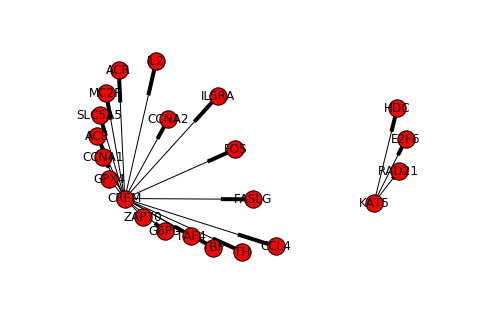

In [7]:
names = nx.get_node_attributes(G, 'name')
nx.draw(G, labels = names,with_labels=True)
plt.show()

You can choose to upload this graph to an ndex server. 

In [ ]:
G.upload_to('http://public.ndexbio.org', 'your_username', 'your_password')

If you do, the graph should look like this:

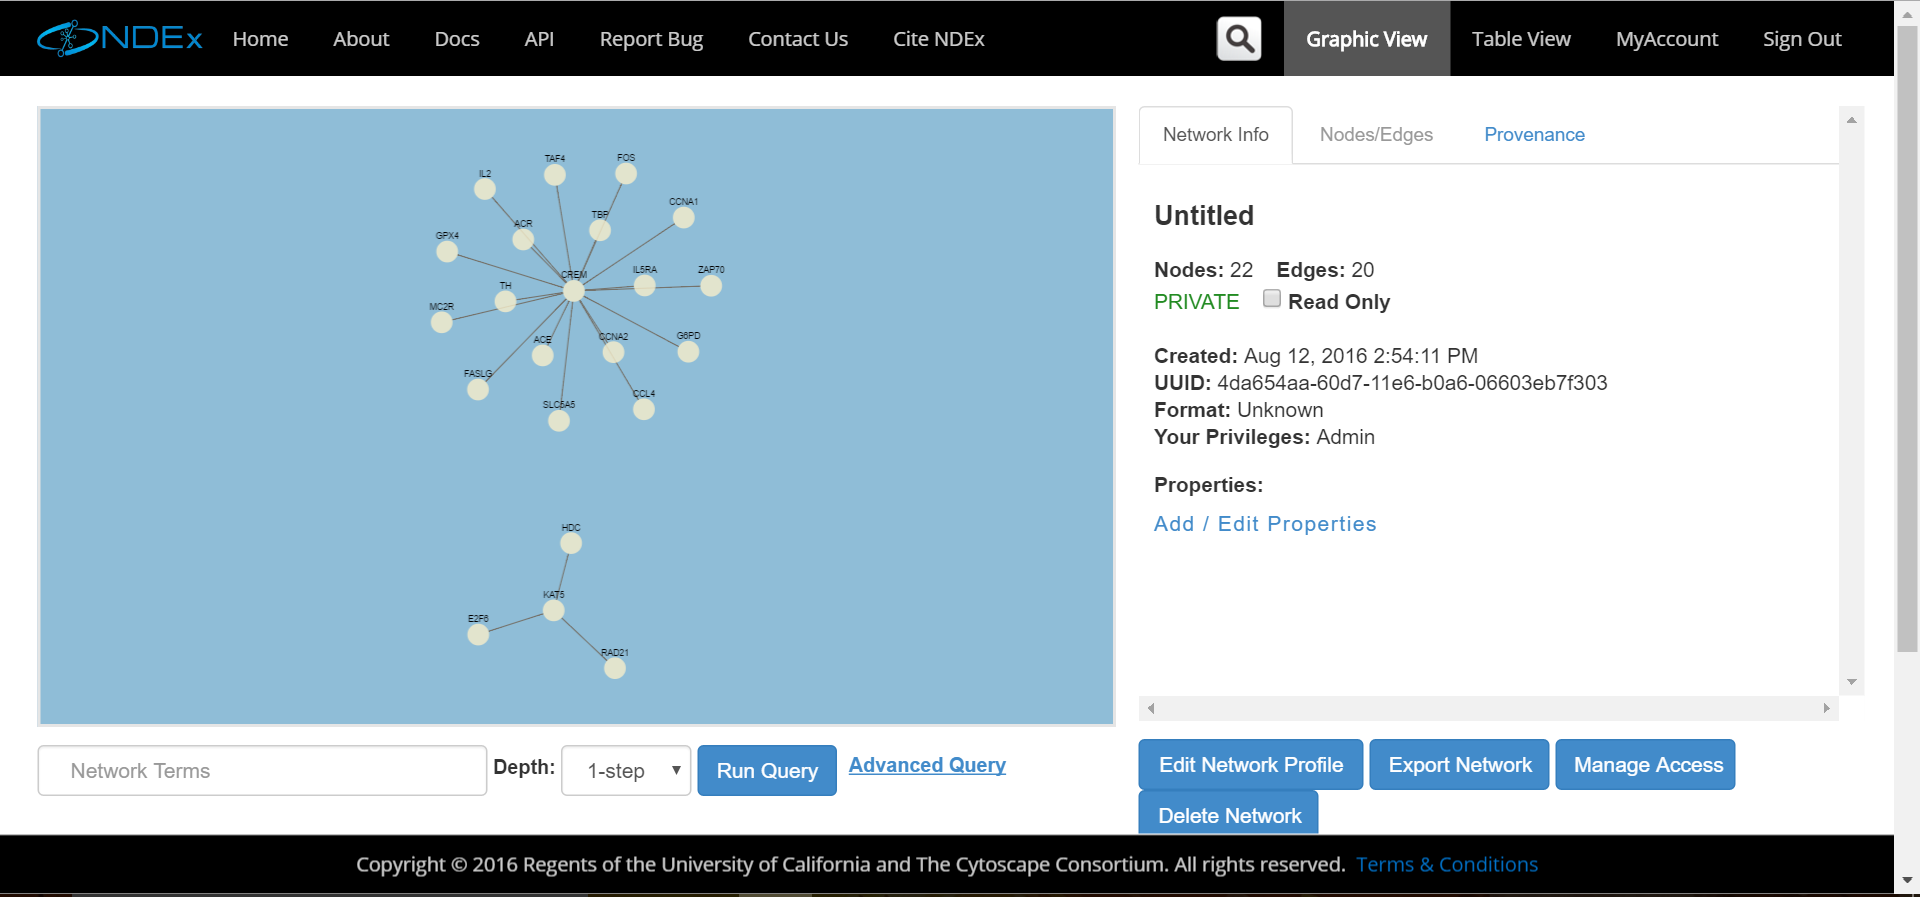

In [8]:
from IPython.display import Image, display;
display(Image(filename='screenshot_1.PNG'))

## Annotating a Graph

Whereas the load method created the nodes, edges, and edge attributes, the annotate method adds node attributes using annotate(graph, filename). 

In this example, we will use annotateexample.txt to add information about the color of each node. Note that these colors were randomly assigned and have no significance. Below is what the file looks like.
Keep in mind that the first column's heading is in lower case. It will not work if you write it in upper case.

In [ ]:
name	Color
CREM	blue
KAT5	blue
ZAP70	blue
CCNA2	blue
CCNA1	blue
TBP	red
ACE	red
ACR	red
TAF4	red
G6PD	red
IL2	red
SLC5A5	green
TH	green
CCL4	green
FOS	green
IL5RA	green
FASLG	yellow
MC2R	yellow
GPX4	yellow
E2F6	yellow
HDC	yellow
RAD21	yellow

Now we call on the annotate method and then we upload it to the NDEx server.

In [9]:
toolbox.annotate(G,'annotateexample.txt');

In [ ]:
G.upload_to('http://public.ndexbio.org', 'your_username', 'your_password')

If you choose to upload the graph, it should look the same as the one that you loaded before. If you click on one of the nodes, you will find that there is an added node attribute. The graph below will show you how the graph would look like if the attribute was actually applied to the node's color.

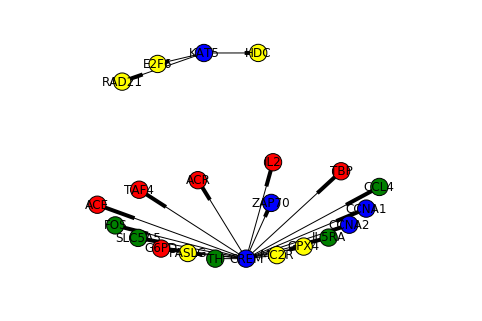

In [18]:
names = nx.get_node_attributes(G, 'name')
colors = nx.get_node_attributes(G,'Color')
nx.draw(G, labels = names,with_labels=True,node_color=colors.values())
plt.show()

## Applying Cytoscape Style Template

Cytoscape has options for styling your graph such as coloration, directional arrow design, etc. The toolbox allows you to use a "template" that is based off of a network's style of your choice. In order for a node or an edge to be stylized in a certain way, it must have an attribute that corresponds to the style. 
For this tutorial, we are primarily concerned with one kind of template: tutorial_template. You can view it on the NDEx public server.  

tutorial_template uses the attribute 'st_layout' to determine the coloration of your nodes. Also, the edges are directed (there are arrows pointing in a direction) depending on how you created each edge. The first node that you list points to the second node. 

First we will create a new graph where we load the information from the text file below:

In [ ]:
name	target	
Source	F1
Source	F2
Source	F3
Source	B1
Source	B2
R1	Source
R2	Source
R3	Source
B1	Target
B2	Target
F1	Target
F2	Target
F3	Target
Target	R1
Target	R2
Target	R3
Target	B1
Target	B2
B1	Source
B2	Source

In [12]:
M = NdexGraph()
toolbox.load(M, 'templateexample.txt', header=True)

Then we will annotate the graph according to the node's specifications:

In [ ]:
name	st_layout
Source	Source
F1	Forward
F2	Forward
F3	Forward
B1	Both
B2	Both
R1	Reverse
R2	Reverse
R3	Reverse
Target	Target

In [13]:
toolbox.annotate(M, "templateannotate.txt")

apply_source_target_layout(graph) changes the positioning of the nodes depending on the node's st_layout. Source and Target are on either side, Reverse is on the top, Both is in the middle, and Forward is on the bottom. 

In [14]:
toolbox.apply_source_target_layout(M)

{1: {'st_layout': 'Source', 'name': 'Source'}, 2: {'st_layout': 'Reverse', 'name': 'R1'}, 3: {'st_layout': 'Reverse', 'name': 'R2'}, 4: {'st_layout': 'Reverse', 'name': 'R3'}, 5: {'st_layout': 'Both', 'name': 'B1'}, 6: {'st_layout': 'Both', 'name': 'B2'}, 7: {'st_layout': 'Forward', 'name': 'F1'}, 8: {'st_layout': 'Forward', 'name': 'F2'}, 9: {'st_layout': 'Forward', 'name': 'F3'}, 10: {'st_layout': 'Target', 'name': 'Target'}}


Now we will apply the template. The method that you use is called apply_template(graph, template_id). The template_id is the UUID of a graph that you want to use the styling from.

In [15]:
template_id = '4f53171c-600f-11e6-b0a6-06603eb7f303'
toolbox.apply_template(M, template_id)

The graph should look something like the graph below. 

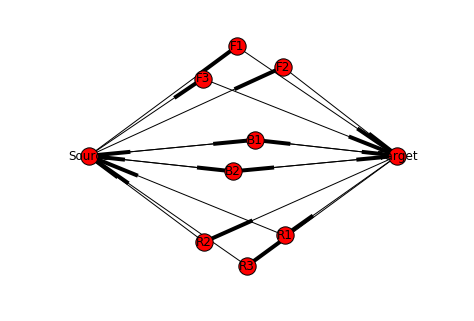

In [17]:
names = nx.get_node_attributes(M,'name')
positions = M.pos
#positions
nx.draw(M, positions,labels=names)
plt.show()

Source is green. Target is blue. Forward has edges that go from the source to the target node. Reverse is purple and the edges go in an opposite direction. Both has edges going in both directions. Please not that although there are specifications for the node attribute, the toolbox will not check if the edges are going in the correct direction. 

In [ ]:
M.upload_to('http://public.ndexbio.org', 'your_username', 'your_password')

If you upload the graph, it should look something like this:

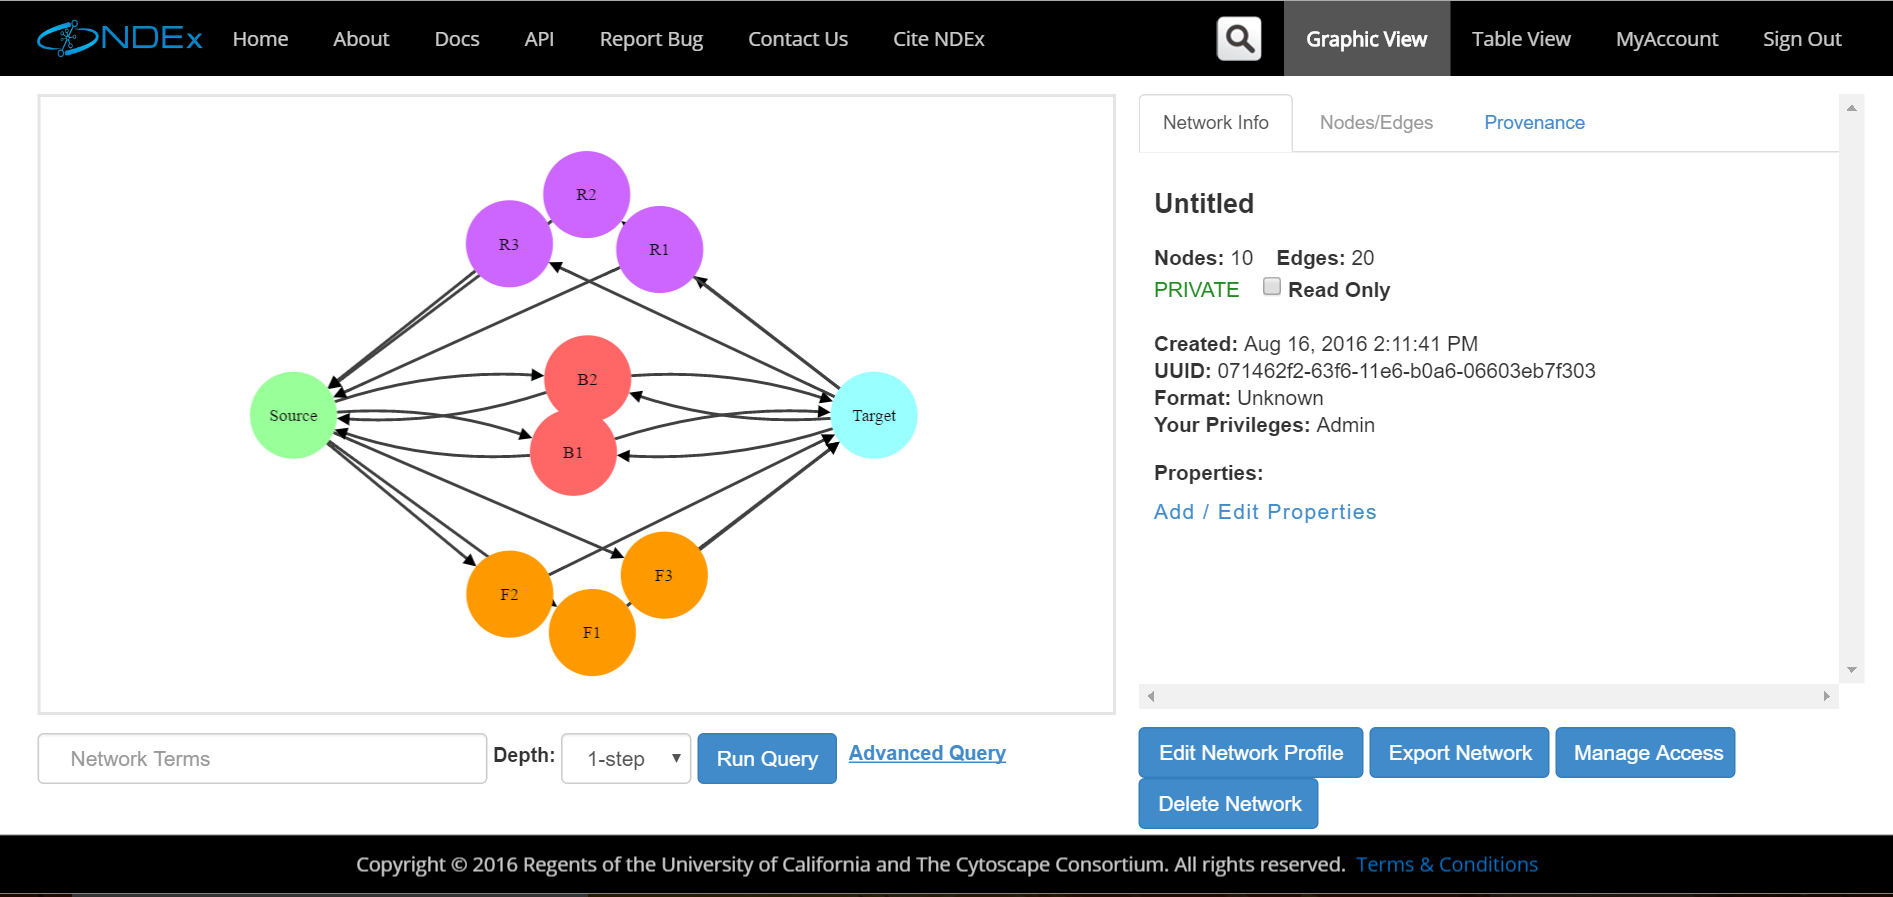

In [19]:
from IPython.display import Image, display;
display(Image(filename='screenshot_3.PNG'))